<a href="https://colab.research.google.com/github/merrymira/UPASS_ML_WEEK4/blob/main/UPASS_ML_WEEK4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Exercise

Features Engineering for Linear Regression Model

Reference:
https://www.kaggle.com/code/klmsathishkumar/shipping-cost-prediction/notebook

Training dataset:
https://raw.githubusercontent.com/merrymira/UPASS_ML_WEEK4/main/train.csv

Testing dataset:
https://raw.githubusercontent.com/merrymira/UPASS_ML_WEEK4/main/test.csv

We will use features engineering technique to improve the predicting performance of shipping cost from linear regression model.

The steps are:

1. Load Explore and Prepare Dataset
2. Feature Engineering

*   Imputation
*   Discretization
*   Categorical Encoding
*   Feature Splitting
*   Handling Outliers
*   Variable Transformations
*   Scaling
*   Feature Creation in ML   
    
3. Assess Baseline
4. Analyse the result from performance

##1. Load Explore and Prepare Dataset

**[1.1]** Import the pandas and numpy packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**[1.2]** Create a variable called file_url containing the link to the CSV file

In [3]:
file_url = "https://raw.githubusercontent.com/merrymira/UPASS_ML_WEEK4/main/train.csv"

**[1.3]** Load the data into a DataFrame called df

In [4]:
org_train = pd.read_csv(file_url, index_col=0)
df_train = pd.read_csv(file_url, index_col=0)

**[1.4]** Display the first 5 rows of df

In [5]:
df_train.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",5.649995
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",5.081156
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",5.045294
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",5.088584
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",5.076610


**[1.5]** Display the summary (info) of df

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Id            6500 non-null   object 
 1   Artist Name            6500 non-null   object 
 2   Artist Reputation      5750 non-null   float64
 3   Height                 6125 non-null   float64
 4   Width                  5916 non-null   float64
 5   Weight                 5913 non-null   float64
 6   Material               5736 non-null   object 
 7   Price Of Sculpture     6500 non-null   float64
 8   Base Shipping Price    6500 non-null   float64
 9   International          6500 non-null   object 
 10  Express Shipment       6500 non-null   object 
 11  Installation Included  6500 non-null   object 
 12  Transport              5108 non-null   object 
 13  Fragile                6500 non-null   object 
 14  Customer Information   6500 non-null   object 
 15  Remo

**[1.6]** Check null values

In [7]:
df_train.isnull().sum()

Customer Id                 0
Artist Name                 0
Artist Reputation         750
Height                    375
Width                     584
Weight                    587
Material                  764
Price Of Sculpture          0
Base Shipping Price         0
International               0
Express Shipment            0
Installation Included       0
Transport                1392
Fragile                     0
Customer Information        0
Remote Location           771
Scheduled Date              0
Delivery Date               0
Customer Location           0
Cost                        0
dtype: int64

In [8]:
# prompt: seperate categorical column and numerical

cat_cols = df_train.select_dtypes(include=['object']).columns.tolist()
num_cols = df_train.select_dtypes(exclude=['object']).columns.tolist()

print("Categorical columns with missing values:")
print(df_train[cat_cols].columns[df_train[cat_cols].isnull().any()])

print("\nNumerical columns with missing values:")
print(df_train[num_cols].columns[df_train[num_cols].isnull().any()])

Categorical columns with missing values:
Index(['Material', 'Transport', 'Remote Location'], dtype='object')

Numerical columns with missing values:
Index(['Artist Reputation', 'Height', 'Width', 'Weight'], dtype='object')


#2. Features Engineering
Working with numerical values


In [9]:
name_counts = df_train['Artist Name'].value_counts()
name_counts_morethanone = name_counts[name_counts > 1].index.tolist()
name_counts_justnone = name_counts[name_counts == 1].index.tolist()

len(name_counts_morethanone), len(name_counts_justnone)

(46, 6403)

In [10]:
# prompt: check if name_counts_morethanone match item in name_counts_justnone

set(name_counts_morethanone) & set(name_counts_justnone)


set()

In [11]:
# prompt: fill nan in Artist Reputation with 0

df_train['Artist Reputation'].fillna(0, inplace=True)


**[2.1]** Immutation for 'Height', 'Width', 'Weight'

* Missing numerical variables are generally replaced by Mean or Median.



In [12]:
# prompt: fill 'Height', 'Width', 'Weight' with mean

df_train['Height'] = df_train['Height'].fillna(df_train['Height'].mean())
df_train['Width'] = df_train['Width'].fillna(df_train['Width'].mean())
df_train['Weight'] = df_train['Weight'].fillna(df_train['Weight'].mean())


In [13]:
# Placeholder for student's code
# Try fill 'Height', 'Width', 'Weight' with median

Missing categorical variables are generally replaced by Mode.

In [14]:
# prompt: fill nan Material with mode

df_train['Material'].fillna(df_train['Material'].mode()[0], inplace=True)
df_train['Transport'].fillna(df_train['Transport'].mode()[0], inplace=True)
df_train['Remote Location'].fillna(df_train['Remote Location'].mode()[0], inplace=True)

In [15]:
# check for null values

df_train.isnull().sum()

Customer Id              0
Artist Name              0
Artist Reputation        0
Height                   0
Width                    0
Weight                   0
Material                 0
Price Of Sculpture       0
Base Shipping Price      0
International            0
Express Shipment         0
Installation Included    0
Transport                0
Fragile                  0
Customer Information     0
Remote Location          0
Scheduled Date           0
Delivery Date            0
Customer Location        0
Cost                     0
dtype: int64

**[2.2]** Discretization

* Discretization involves grouping data values into bins.


In [16]:
df_train.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.000000,4128.000000,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",5.649995
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.000000,61.000000,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",5.081156
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.000000,237.000000,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",5.045294
3,fffe350031003300,Robert Chaires,0.12,9.0,9.617647,400694.821918,Aluminium,5.81,16.31,No,No,No,Roadways,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",5.088584
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.000000,324.000000,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",5.076610


In [17]:
df_train['Material'].unique()

array(['Brass', 'Clay', 'Aluminium', 'Wood', 'Marble', 'Bronze', 'Stone'],
      dtype=object)

In [18]:
# prompt: create new column from 'Material' classify metal or non metal

df_train['Material_cat'] = np.where(df_train['Material'].str.contains('Metal'), 'Metal', 'Non-Metal')
df_train.head()


,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,...,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost,Material_cat
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.000000,4128.000000,Brass,13.91,16.27,Yes,...,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",5.649995,Non-Metal
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.000000,61.000000,Brass,6.83,15.00,No,...,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",5.081156,Non-Metal
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.000000,237.000000,Clay,4.96,21.18,No,...,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",5.045294,Non-Metal
3,fffe350031003300,Robert Chaires,0.12,9.0,9.617647,400694.821918,Aluminium,5.81,16.31,No,...,No,Roadways,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",5.088584,Non-Metal
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.000000,324.000000,Aluminium,3.18,11.94,Yes,...,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",5.076610,Non-Metal


**[2.3]** One-Hot Encoding

Beware OHE could dramatically increase the number of features and result in highly correlated features.

In [19]:
# prompt: one-hot encoding for Material column

df_train = pd.get_dummies(df_train, columns=['Material'], prefix='Material_')


In [20]:
pd.set_option('display.max_columns', None)
df_train.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost,Material_cat,Material__Aluminium,Material__Brass,Material__Bronze,Material__Clay,Material__Marble,Material__Stone,Material__Wood
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.000000,4128.000000,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",5.649995,Non-Metal,0,1,0,0,0,0,0
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.000000,61.000000,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",5.081156,Non-Metal,0,1,0,0,0,0,0
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.000000,237.000000,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",5.045294,Non-Metal,0,0,0,1,0,0,0
3,fffe350031003300,Robert Chaires,0.12,9.0,9.617647,400694.821918,5.81,16.31,No,No,No,Roadways,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",5.088584,Non-Metal,1,0,0,0,0,0,0
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.000000,324.000000,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",5.076610,Non-Metal,1,0,0,0,0,0,0


**[2.4]** Feature Splitting

In [21]:
# prompt: df_train Scheduled Date and Delivery Date to datetime

df_train['Scheduled Date'] = pd.to_datetime(df_train['Scheduled Date'])
df_train['Delivery Date'] = pd.to_datetime(df_train['Delivery Date'])


In [22]:
# prompt: split Scheduled Date to year month day columns seperate

df_train['Scheduled_Year'] = df_train['Scheduled Date'].dt.year
df_train['Scheduled_Month'] = df_train['Scheduled Date'].dt.month
df_train['Scheduled_Day'] = df_train['Scheduled Date'].dt.day


In [23]:
pd.reset_option('all')
df_train.head()

<ipython-input-23-cc7c4be67025>:1: FutureWarning: column_space is deprecated and will be removed in a future version. Use df.to_string(col_space=...) instead.
  pd.reset_option('all')
<ipython-input-23-cc7c4be67025>:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  pd.reset_option('all')
<ipython-input-23-cc7c4be67025>:1: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  pd.reset_option('all')


,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,International,Express Shipment,...,Material__Aluminium,Material__Brass,Material__Bronze,Material__Clay,Material__Marble,Material__Stone,Material__Wood,Scheduled_Year,Scheduled_Month,Scheduled_Day
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.000000,4128.000000,13.91,16.27,Yes,Yes,...,0,1,0,0,0,0,0,2015,6,7
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.000000,61.000000,6.83,15.00,No,No,...,0,1,0,0,0,0,0,2017,3,6
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.000000,237.000000,4.96,21.18,No,No,...,0,0,0,1,0,0,0,2015,3,9
3,fffe350031003300,Robert Chaires,0.12,9.0,9.617647,400694.821918,5.81,16.31,No,No,...,1,0,0,0,0,0,0,2015,5,24
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.000000,324.000000,3.18,11.94,Yes,Yes,...,1,0,0,0,0,0,0,2016,12,18


**[2.5]** Handling Outliers

Handline unusually high or low values in the dataset by Remove, Replace, or Capping the values

In [24]:
org_train.describe()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
count,5750.000000,6125.000000,5916.000000,5.913000e+03,6500.00000,6500.000000,6500.000000
mean,0.461850,21.766204,9.617647,4.006948e+05,1192.42009,37.407174,6.595800
std,0.265781,11.968192,5.417000,2.678081e+06,8819.61675,26.873519,1.650965
min,0.000000,3.000000,2.000000,3.000000e+00,3.00000,10.000000,4.466712
25%,0.240000,12.000000,6.000000,5.030000e+02,5.23000,16.700000,5.428446
50%,0.450000,20.000000,8.000000,3.102000e+03,8.02500,23.505000,6.129388
75%,0.680000,30.000000,12.000000,3.645600e+04,89.47000,57.905000,7.220572
max,1.000000,73.000000,50.000000,1.179279e+08,382385.67000,99.980000,16.226361


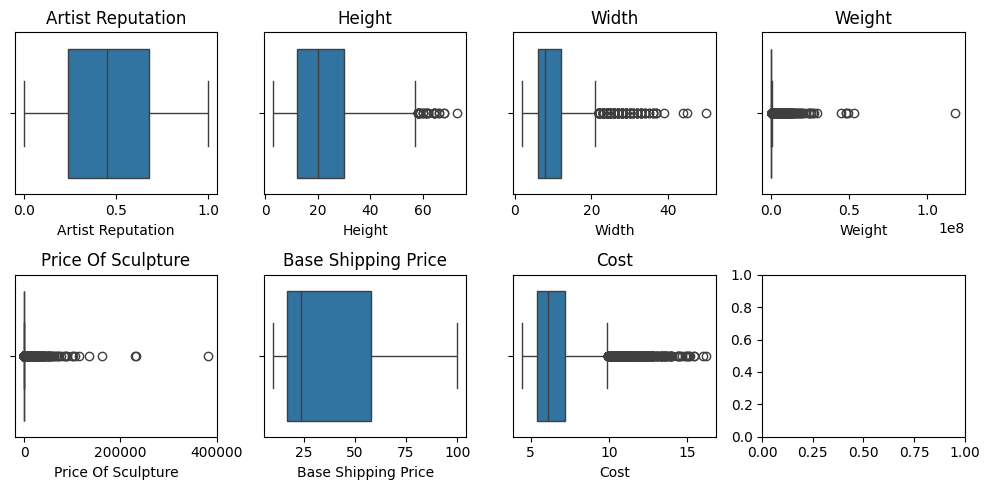

In [34]:
# prompt: plot bloxplot for all column in org_train

import seaborn as sns

# Calculate the number of rows and columns for subplots
num_rows = 2
num_columns = len(num_cols) // 2 + len(num_cols) % 2  # Ensure an even number of columns if len(num_cols) is odd

# Set up the subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(10, 5))

# Flatten the axes array if there is only one row
axes = axes.flatten()

# Iterate through numerical columns and create boxplots
for i, col in enumerate(num_cols):
    if i < len(axes):  # Check if there are more axes available
      sns.boxplot(x=org_train[col], ax=axes[i])
      axes[i].set_title(col)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

In [26]:
org_train.describe()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
count,5750.000000,6125.000000,5916.000000,5.913000e+03,6500.00000,6500.000000,6500.000000
mean,0.461850,21.766204,9.617647,4.006948e+05,1192.42009,37.407174,6.595800
std,0.265781,11.968192,5.417000,2.678081e+06,8819.61675,26.873519,1.650965
min,0.000000,3.000000,2.000000,3.000000e+00,3.00000,10.000000,4.466712
25%,0.240000,12.000000,6.000000,5.030000e+02,5.23000,16.700000,5.428446
50%,0.450000,20.000000,8.000000,3.102000e+03,8.02500,23.505000,6.129388
75%,0.680000,30.000000,12.000000,3.645600e+04,89.47000,57.905000,7.220572
max,1.000000,73.000000,50.000000,1.179279e+08,382385.67000,99.980000,16.226361


In [35]:
train_rm_out = org_train.copy()
train_rp_out = org_train.copy()
train_cp_out = org_train.copy()

In [39]:
# prompt: dealing with outliner by remove replace capping

# Remove outliers
Q1 = train_rm_out['Height'].quantile(0.25)
Q3 = train_rm_out['Height'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

train_rm_out = train_rm_out[(train_rm_out['Height'] >= lower_bound) & (org_train['Height'] <= upper_bound)]

In [40]:
# prompt: replace outliner in train_rp_out

# Replace outliers
Q1 = train_rp_out['Height'].quantile(0.25)
Q3 = train_rp_out['Height'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

train_rp_out['Height'] = np.where((train_rp_out['Height'] < lower_bound) | (train_rp_out['Height'] > upper_bound), train_rp_out['Height'].median(), train_rp_out['Height'])


In [41]:
# Cap outliers
train_cp_out['Height'] = train_cp_out['Height'].clip(lower_bound, upper_bound)

**Comparing** the shape of the dataset after performing Remove, Replace, Capping methods on outliers

In [42]:
train_rm_out.shape, train_rp_out.shape, train_cp_out.shape

((6095, 20), (6500, 20), (6500, 20))

In [31]:
train_rm_out.describe()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
count,5416.000000,6095.000000,5564.000000,5.571000e+03,6095.000000,6095.000000,6095.000000
mean,0.459983,21.568663,9.532351,3.893109e+05,1124.403187,37.316886,6.585931
std,0.265164,11.657928,5.277406,2.633229e+06,8299.841620,26.810891,1.639829
min,0.000000,3.000000,2.000000,3.000000e+00,3.000000,10.000000,4.466712
25%,0.240000,12.000000,6.000000,5.030000e+02,5.230000,16.640000,5.428424
50%,0.440000,20.000000,8.000000,3.109000e+03,7.940000,23.470000,6.128091
75%,0.670000,29.000000,12.000000,3.639450e+04,86.955000,57.865000,7.208885
max,1.000000,57.000000,45.000000,1.179279e+08,382385.670000,99.980000,16.226361


In [37]:
train_rp_out.describe()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
count,5750.000000,6125.000000,5916.000000,5.913000e+03,6500.00000,6500.000000,6500.000000
mean,0.461850,21.560980,9.617647,4.006948e+05,1192.42009,37.407174,6.595800
std,0.265781,11.629854,5.417000,2.678081e+06,8819.61675,26.873519,1.650965
min,0.000000,3.000000,2.000000,3.000000e+00,3.00000,10.000000,4.466712
25%,0.240000,12.000000,6.000000,5.030000e+02,5.23000,16.700000,5.428446
50%,0.450000,20.000000,8.000000,3.102000e+03,8.02500,23.505000,6.129388
75%,0.680000,29.000000,12.000000,3.645600e+04,89.47000,57.905000,7.220572
max,1.000000,57.000000,50.000000,1.179279e+08,382385.67000,99.980000,16.226361


In [32]:
train_cp_out.describe()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
count,5750.000000,6125.000000,5916.000000,5.913000e+03,6500.00000,6500.000000,6500.000000
mean,0.461850,21.742204,9.617647,4.006948e+05,1192.42009,37.407174,6.595800
std,0.265781,11.889541,5.417000,2.678081e+06,8819.61675,26.873519,1.650965
min,0.000000,3.000000,2.000000,3.000000e+00,3.00000,10.000000,4.466712
25%,0.240000,12.000000,6.000000,5.030000e+02,5.23000,16.700000,5.428446
50%,0.450000,20.000000,8.000000,3.102000e+03,8.02500,23.505000,6.129388
75%,0.680000,30.000000,12.000000,3.645600e+04,89.47000,57.905000,7.220572
max,1.000000,57.000000,50.000000,1.179279e+08,382385.67000,99.980000,16.226361


#3. Train LinearRegression Model


**[3.1]** Import the LinearRegression model from sklearn.linear_model

In [29]:
# Placeholder for student's code

**[3.2]** Create a LinearRegression object called lr and fit (X, y)

In [30]:
# Placeholder for student's code

**[3.3]** Print the intercept and coefficient of the lr model

In [31]:
# Placeholder for student's code

**[3.4]** Calculate the RMSE and MAE between the target variable and the predictions

In [32]:
# Placeholder for student's code

In [33]:
# Placeholder for student's code

#4. Train Lasso Model with all Features


**[4.1]** Import the Lasso model from sklearn.linear_model

In [34]:
# Placeholder for student's code

**[4.2]** Create a Lasso object called lr and fit (X, y)

In [35]:
# Placeholder for student's code

**[4.3]** Calculate the RMSE and MAE between the target variable and the predictions

In [36]:
# Placeholder for student's code

In [37]:
# Placeholder for student's code